- 모듈 가져오기

In [1]:
# 전처리를 위한 모듈
import pandas as pd
import numpy as np
import time
# 크롤링을 위한 모듈
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup
# 아래의 코드를 돌릴때 나는 경고문구를 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # 웹드라이버를 브라우저 없이 실행
chrome_options.add_argument('--no-sandbox') # 보안기능 비활성화
chrome_options.add_argument('--disable-dev-shm-usage') # dev-shm을 사용 X
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options) # 공유메모리 담당

- 인기글들의 url을 가져옴

In [3]:
# 최근인기순, 역대인기순, 최근순의 태그를 가져옴
tags = ['popular', 'best', 'recent']
urls = []
for tag in tags:
  # 수집하고자하는 주소
  driver.get("https://ohou.se/projects?writer=self&order=" + tag)
  time.sleep(2)
  for i in range(12): # 각 12개씩 총 36개의 포스팅을 가져옴
    url = driver.find_elements(by=By.CSS_SELECTOR, value='a.project-feed__item__link')[i].get_attribute('href')
    urls.append(url)

- 각 url을 통하여 포스팅 내용 크롤링

In [4]:
# 저장할 데이터 프레임 생성
data = pd.DataFrame(data=[], columns=['순위', '날짜', '제목', '아이디', '거주구분', '평수', '지역', '스타일', '포스팅내용'])

In [5]:
# 크롤링을 위한 함수 정의
def collector(url, data, k):
  req = requests.get(url)
  # 크롤링을 위한 준비
  soup = BeautifulSoup(req.text, 'html.parser')

  # 수집할 내용들
  date = soup.select('div.content-detail-header__author-date')[0].text.replace(' ','') # 날짜 / 공백 없애줌
  title = soup.select('h1')[0].text # 제목
  id = soup.select('div.content-detail-header__author-name')[0].text # 아이디
  ## 태그에서 찾기
  dt = [t.text for t in soup.select('div.project-detail-metadata-detail-item > dt')]
  dd = [t.text for t in soup.select('div.project-detail-metadata-detail-item > dd')]
  # 거주공간
  try: cat = dd[dt.index('공간')] 
  except: cat = None
  # 평수
  try: size = dd[dt.index('평수')]
  except: size = None
  # 지역
  try: city = dd[dt.index('지역')]
  except: city = None
  # 스타일
  try: style = dd[dt.index('스타일')]
  except: style = None
  p = [soup.select('p')[i].text.replace('\xa0',' ').replace("\r","").replace("\n","").replace("'","") for i in range(1,len(soup.select('p'))-1)] # 포스팅 내용
  p = ' '.join(p)

  # data에 저장
  temp = []
  temp.append((k, date,title,id,cat,size,city,p))
  temp = pd.DataFrame(temp, columns=('순위','날짜','제목','아이디','거주구분', '평수', '지역', '포스팅내용'))
  data = pd.concat([data,temp])

  print(str(k+1) + '번째 포스팅글 수집 끝')
  
  return data

In [6]:
# 수집한 url마다 포스팅 글을 수집
for k,url in enumerate(urls):
  data = collector(url,data,k)
data = data.reset_index()

1번째 포스팅글 수집 끝
2번째 포스팅글 수집 끝
3번째 포스팅글 수집 끝
4번째 포스팅글 수집 끝
5번째 포스팅글 수집 끝
6번째 포스팅글 수집 끝
7번째 포스팅글 수집 끝
8번째 포스팅글 수집 끝
9번째 포스팅글 수집 끝
10번째 포스팅글 수집 끝
11번째 포스팅글 수집 끝
12번째 포스팅글 수집 끝
13번째 포스팅글 수집 끝
14번째 포스팅글 수집 끝
15번째 포스팅글 수집 끝
16번째 포스팅글 수집 끝
17번째 포스팅글 수집 끝
18번째 포스팅글 수집 끝
19번째 포스팅글 수집 끝
20번째 포스팅글 수집 끝
21번째 포스팅글 수집 끝
22번째 포스팅글 수집 끝
23번째 포스팅글 수집 끝
24번째 포스팅글 수집 끝
25번째 포스팅글 수집 끝
26번째 포스팅글 수집 끝
27번째 포스팅글 수집 끝
28번째 포스팅글 수집 끝
29번째 포스팅글 수집 끝
30번째 포스팅글 수집 끝
31번째 포스팅글 수집 끝
32번째 포스팅글 수집 끝
33번째 포스팅글 수집 끝
34번째 포스팅글 수집 끝
35번째 포스팅글 수집 끝
36번째 포스팅글 수집 끝


In [7]:
# 데이터 확인
data.head(3)

,index,순위,날짜,제목,아이디,거주구분,평수,지역,스타일,포스팅내용
0,0,0,21.10.06,"계획서만 50장! 내 머릿 속 인테리어,그대로 실현하기",to-mohome,아파트,33평,대구광역시 달성군,NaN,"안녕하세요. 오늘의 집에 첫 집들이를 소개하게 된 ""투모""입니다. 얼마 전 새로 이..."
1,0,1,21.10.06,"온전한 쉼을 위해, 취향으로 가득 채운 옐로우 하우스",alderdn,원룸&오피스텔,10평,경기도 성남시,NaN,안녕하세요. 유전공학 분야에서 연구원으로 일하고 있는 알데입니다. 저는 프로 집순...
2,0,2,21.10.06,"20년이 넘은 복도식 아파트, 반셀프로 단정하게 고치기",E.T.CITY,아파트,22평,서울특별시,NaN,안녕하세요 저희는 이번 5월에 결혼해서 따끈따끈한 일상을 보내고 있는 은또네입니다 ...


## wordcloud

In [15]:
import os
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

- 전처리

In [9]:
# txt 데이터로 저장 / 제목과 포스팅 두가지로 나누어 분석
title = data['제목']
path = './data/'
title.to_csv(path + '오늘의 집 제목.txt', index = False)
posting = data['포스팅내용']
posting.to_csv(path + '오늘의 집 포스팅.txt', index = False)

In [10]:
# 포스팅
with open(path + '오늘의 집 포스팅.txt', 'r', encoding='utf-8') as f:
    text = f.read()
okt = Okt()
nouns = okt.nouns(text) 
words_pos = [n for n in nouns if len(n) > 1] # 한글자인 것은 제외

# 제목
with open(path + '오늘의 집 제목.txt', 'r', encoding='utf-8') as title:
    text = title.read()
nouns = okt.nouns(text) 
words_title = [n for n in nouns if len(n) > 1]

In [11]:
# 단어 빈도표를 보고 일부 단어 불용어 처리
stopword = ['사용', '저희', '정말', '우리', '시공', '설치', '아파트', '모델링', '침대','때문','전체','가장','가족',
                '고민','가득','공간','디자이너','매력','미니','셀프','취향','구축','순이','실현','일기','완성','위해','덕분',
                '신혼집', '하우스', '원룸', '오피스텔', '생각', '느낌', '마음', '하나', '아이', '부분','안녕하세요','같아요', '너무', '있는', '있어요', '하고']
# 포스팅
text_pos = [i for i in words_pos if i not in stopword]
text_cnt_pos = Counter(text_pos)
# 제목
text_title = [i for i in words_title if i not in stopword]
text_cnt_title = Counter(text_title)

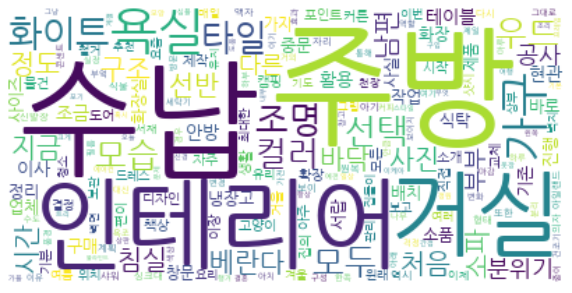

In [12]:
# 포스팅
fontpath = path + 'ng.ttf'
savepath = './img/'

wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      # colormap = "Accent_r", 
                      # mask = img_mask, 
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(text_cnt_pos)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

plt.savefig(savepath + "result_pos.png")
plt.show()

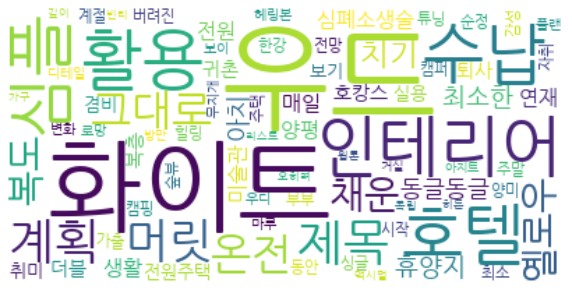

In [13]:
# 제목
wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      # colormap = "Accent_r", 
                      # mask = img_mask, 
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(text_cnt_title)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

plt.savefig(savepath + "result_title.png")
plt.show()

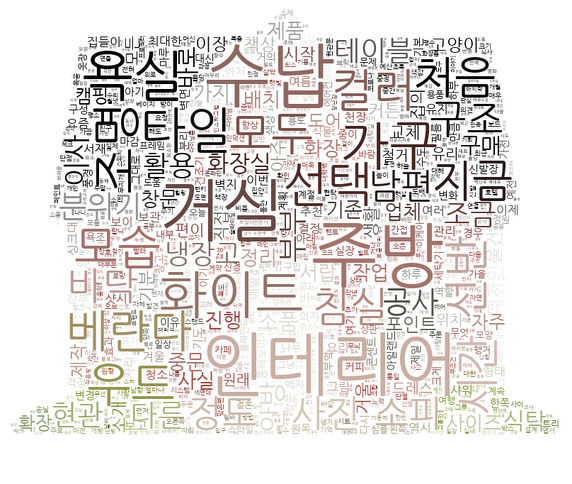

In [17]:
# 집 그림을 배경으로 wc
stopwords = set(STOPWORDS)    
img_mask = np.array(Image.open(savepath + "집.png")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(STOPWORDS)    
FONTPATH =  path + "ng.ttf"

wordcloud = WordCloud(max_font_size = 100, max_words = 1000, background_color='white', stopwords=stopwords, random_state=10,mask=img_mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(text_cnt_pos)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.savefig(savepath + "result_house.png")
plt.show()

### TF-IDF를 통한 Wordcloud

- 포스팅 내용

In [18]:
# 블용어를 처리해주는함수 생성
def processString(txt):
    stopword = ['사용', '저희', '정말', '우리', '시공', '설치', '아파트', '모델링', '침대','때문','전체','가장','가족',
                '고민','가득','공간','디자이너','매력','미니','셀프','취향','구축','순이','실현','일기','완성','위해','덕분',
                '신혼집', '하우스', '원룸', '오피스텔', '생각', '느낌', '마음', '하나', '아이', '부분','안녕하세요','같아요', '너무', '있는', '있어요', '하고']
    
    for word in stopword:
        txt = txt.replace(word, '')
    okt = Okt()
    nouns = okt.nouns(txt)
    
    return ' '.join(nouns)

In [19]:
DOCUMENT_SET = data['포스팅내용'].apply(processString);DOCUMENT_SET[:3]

0    오늘 집 첫 집들이 소개 투모 얼마 전 이사 온 현재 집 무한 애정 매일 재미 분 ...
1    유전공학 분야 연구원 일 저 프로 집 회사 외 대의 시간 항상 집 집 여러 가지 취...
2    이번 결혼 일상 은또 부부 둘 직장인 작년 서울 자가 생애 첫 보금자리 마련 첫 보...
Name: 포스팅내용, dtype: object

In [20]:
# 정규화 기준의 변경, norm = "l1", norm = "l2" (default), norm = None
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(
                             norm = "l2",
                            )      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(DOCUMENT_SET)
doc_term_mat_d = doc_term_mat.toarray()
# 데이터프레임으로 생성
df_pos =  pd.DataFrame(doc_term_mat_d, columns=vectorizer.get_feature_names());df_pos.head(3)

,가게,가격,가구,가구라,가기,가까이,가끔,가늠,가능,가닥,...,흐흐,흑백,흑백사진,흔적,흥미,흰색,히든,힌지,힌트,힐링
0,0.0,0.0,0.009902,0.0,0.0,0.0,0.0,0.000000,0.025952,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.037454,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.082794
2,0.0,0.0,0.052779,0.0,0.0,0.0,0.0,0.032375,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.029723,0.0,0.0,0.000000


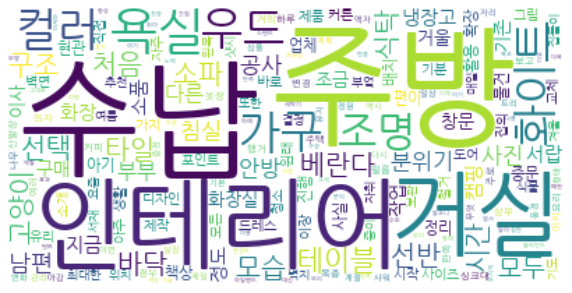

In [21]:
# tfidf wordcloud
wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(df_pos.sum())

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

plt.savefig(savepath+"tfidf_pos.png")
plt.show()

- 제목

In [22]:
DOCUMENT_SET_title = data['제목'].apply(processString);DOCUMENT_SET_title[:3]

0    계획 만 장 내 머릿 속 인테리어 그대로
1                 온전 채운 옐로우
2                   복도 로 치기
Name: 제목, dtype: object

In [23]:
vectorizer = TfidfVectorizer(
                             norm = "l2",
                            )      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(DOCUMENT_SET_title)
doc_term_mat_d = doc_term_mat.toarray()
df_title = pd.DataFrame(doc_term_mat_d, columns=vectorizer.get_feature_names());df_title.head(3)

,가구,가출,감성,거실,겸비,계절,계획,귀촌,그대로,깊이,...,플랜,한강,헤링본,호캉스,호텔,화이트,활용,휴양지,히든,힐링
0,0.0,0.0,0.0,0.0,0.0,0.0,0.512738,0.0,0.512738,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


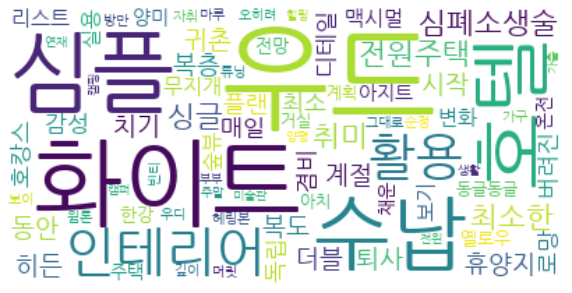

In [24]:
# tfidf wordcloud
wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white', 
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(df_title.sum())

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

plt.savefig(savepath+"tfidf_title.png")
plt.show()

### END